# 1. Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6),dpi=144)  #設置畫布大小和辨識率


<Figure size 1152x864 with 0 Axes>

In [2]:
data = pd.read_csv("titanic_train.csv")

- 檢視資料

In [3]:
# data.head(10)
#data.tail(10)
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
29,30,0,3.0,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
98,99,1,2.0,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
288,289,1,2.0,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
144,145,0,2.0,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S
865,866,1,2.0,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
488,489,0,3.0,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,NaN,S
196,197,0,NaN,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
383,384,1,1.0,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
421,422,0,3.0,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
764,765,0,3.0,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S


# 2. EDA

# 3. Preprocess

- 補 NA
- Encoding

In [4]:
df = data.copy()

In [5]:
df['Age'].fillna(df.Age.mean(), inplace = True)
df['Pclass'].fillna(df.Pclass.mode()[0], inplace = True)
df['Embarked'].fillna(df.Embarked.mode()[0], inplace = True)
df = df.drop(columns={"Name","Ticket","Cabin"})

#### encoding
- label encoding
- one hot encoding

In [6]:
df.Sex = df.Sex.map({"female":0, "male":1}).astype(int)
df.Embarked = df.Embarked.map({"C":0, "S":1, "Q":2}).astype(int)

# 4. Model

### 4-1. 切資料集

In [7]:
from sklearn.model_selection import train_test_split
train_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X_train, X_test, y_train, y_test = train_test_split(df[train_cols], df['Survived'], test_size=0.3, random_state=400)

### 4-2. 選擇模型

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


### 4-3. fit model

In [9]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

### 4-4. 評估模型

In [10]:
from sklearn import metrics
print("accuracy:%.2f"% metrics.accuracy_score(y_test, pred))

accuracy:0.84


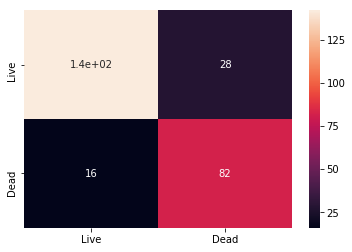

In [11]:
confusion_matrix = metrics.confusion_matrix(y_true= y_test, y_pred=pred)
cm =pd.DataFrame(confusion_matrix , index = ['Live', 'Dead'], columns = [ 'Live', 'Dead'])
sns.heatmap(cm, annot = True)  

# 5. Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scores = cross_val_score(clf, df[train_cols], df['Survived'], cv=3)
np.mean(scores)

0.7878787878787877

# 6. Submission

In [21]:
df_sub = pd.read_csv("test.csv")

In [22]:
## preprocessing
df_sub['Age'].fillna(df.Age.mean(), inplace = True)
df_sub['Pclass'].fillna(df.Pclass.mode()[0], inplace = True)
df_sub['Embarked'].fillna(df.Embarked.mode()[0], inplace = True)
df_sub = df_sub.drop(columns={"Name","Ticket","Cabin"})

In [30]:
df_sub.Fare.fillna(df.Fare.mean(), inplace= True)

In [23]:
## encoding
df_sub.Sex = df_sub.Sex.map({"female":0, "male":1}).astype(int)
df_sub.Embarked = df_sub.Embarked.map({"C":0, "S":1, "Q":2}).astype(int)

In [34]:
pred = model.predict(df_sub[train_cols])
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [72]:
sub = pd.read_csv("gender_submission.csv")

In [37]:
## 方法 1
sub.Survived = pred
sub.to_csv("myanswer.csv", index= False)

In [73]:
## 方法2
df_sub['ans'] = pred
sub = sub.merge(df_sub[['PassengerId','ans']], left_on="PassengerId" ,right_on="PassengerId")

In [74]:
sub.Survived = sub.ans
sub.drop(columns="ans", inplace=True)
sub.to_csv("myanswer2.csv", index=False)